We will learn how to:
- Obtain unbiased estimates of a model's performance
- Diagnose the common problems of machine learning algorithms
- Fine-tune machine learning models
- Evaluate predictive models using different performance metrics

### Streamlining workflows with pipelines

In [4]:
# Importing Breast Cancer dataset

import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# Label-encoding class label

from sklearn.preprocessing import LabelEncoder
X = df.loc[:, 2:].values
y = df.loc[:,1].values
le = LabelEncoder()
y = le.fit_transform(y)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1,

In [9]:
# LabelEncode representation

le.transform(['B','M'])

array([0, 1])

In [10]:
# Splitting the dataset

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [11]:
# Combining transformers and estimators in a pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([('scl', StandardScaler()), 
                    ('pca', PCA(n_components=2)), 
                    ('clf', LogisticRegression(random_state=1))])
pipe_lr.fit(X_train, y_train)
print ('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

# Pipeline takes a list of tuples(identifier of element, scikit-learn transformer or estimator)

Test Accuracy: 0.942


In [13]:
# Applying K-Fold cross-validation

import numpy as np
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(estimator=pipe_lr, X=X_train, y=y_train, cv=10, n_jobs=1)
print 'CV accuracy scores: %s' %scores
print 'CV accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores))

CV accuracy scores: [ 0.975       0.975       0.925       0.925       0.975       1.          0.975
  0.975       0.95        0.97368421]
CV accuracy: 0.965 +/- 0.023


### Debugging Algorithms with Learning and Validation Curves

overfitting: high variance
- large difference between training and validation accuracy
underfitting: high bias
- model has both low training and cross-validation accuracy

#### Diagnosing Bias and Variance Problems with Learning Curves

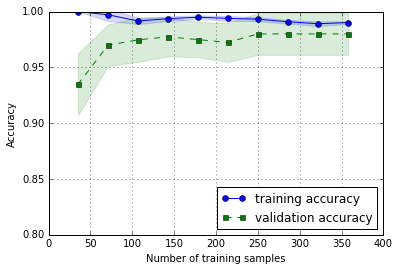

In [15]:
# Plotting learning curves

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.learning_curve import learning_curve

pipe_lr = Pipeline([('scl', StandardScaler()),
                   ('clf', LogisticRegression(penalty='l2', random_state=0),)])
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes=np.linspace(0.1, 1.0, 10),
                                                       cv=10,
                                                       n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, color='blue', marker='o', label='training accuracy')
plt.fill_between(train_sizes, train_mean+train_std, train_mean-train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean+test_std, test_mean-test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8,1.0])
plt.show()

learning_curve uses cross validation to calculate cv accuracy. Based on the graph, the model works well on the test dataset. However there is a slight overfitting due to the gap between the training and test lines

#### Addressing Overfitting and Underfitting with Validation Curves

Validation curves are different from Learning Cureves because instead of plotting the training and test accuracies as functions of sample size, we vary the values of the model parameters.

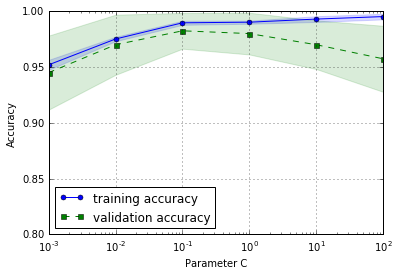

In [22]:
# Plotting the Validation Curves

from sklearn.learning_curve import validation_curve
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(estimator=pipe_lr, 
                                             X=X_train, 
                                             y=y_train, 
                                             param_name='clf__C', 
                                             param_range=param_range,
                                             cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean+train_std, train_mean-train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(param_range, test_mean+test_std, test_mean-test_std, alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower_right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8,1.0])
plt.show()

Based on the validation curve, the higher the C value, the more it overfits. The sweet spot will probably be when the c parameter for the Logistic Regression is C=0.01.

#### Fine-tuning machine learning models via grid search

There are two types of parameters:
- parameters that are learned from training data (ex: weights in LR)
- parameters that are optimized separately aka tuning parameters/hyperparamters (ex: regularization parameter in LR or depth parameter in DT)
Grid Search: powerful hyperparameter optimization technique
- finds optimal combination of hyperparameter values

#### Tuning hyperparameters via Grid Search

In [24]:
# Applying grid search

from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
pipe_svc = Pipeline([('scl', StandardScaler()), ('clf', SVC(random_state=1))])
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'clf__C':param_range, 'clf__kernel':['linear']}, 
              {'clf__C':param_range, 'clf__gamma':param_range, 'clf__kernel':['rbf']}]
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)
gs = gs.fit(X_train, y_train)
print gs.best_score_
print gs.best_params_

0.984924623116
{'clf__gamma': 0.0001, 'clf__C': 1000.0, 'clf__kernel': 'rbf'}


In [25]:
# Applying the best params on the test set

clf = gs.best_estimator_
clf.fit(X_train, y_train)
print 'Test Accuracy: %.3f' %clf.score(X_test, y_test)

Test Accuracy: 0.965


### Looking at Different Performance Evaluation Metrics

In previous sections, we used model accuracy as a metric to quantify performance of a model
There are other performance metrics to measure a model's relevance: precision, recall, F1-score

#### Confusion Matrix

Confusion Matrix: lays out the performance of a learning algorithm
- square matrix that reports the counts of true positive, true negative, false positive, false negative
    - True Positive (TP): Actual and Predicting class is Positive
    - False Negatives (FN): Actual Class is Positive but Predicted Class is Negative
    - False Positives (FP): Actual Class is Negative but Predicted Class is Positive
    - True Negatives (TN): Actual and Predicted Class is Negative

In [27]:
# Using scikit-learn to print confusion matrix in an array

from sklearn.metrics import confusion_matrix
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print confmat

[[106   2]
 [  3  60]]


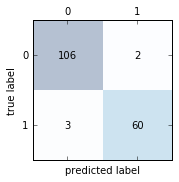

In [28]:
# Plotting the confusion matrix

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i,j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

#### Optimizing the Precision and Recall of a Classification Model

Prediction Error (ERR) and Accuracy (ACC) provides general information about how many samples are misclassified
ERR: sum of all false predictions divided by the number of total predictions
ACC: sum of correct predictions divided by the total number of predictions

True Positive Rate (TPR): sum of True Positives divided by total Positives (FN+TP)
False Positive Rate (FPR): sum of False Positives divided by total Negatives (FP+TN)

Precision (PRE): sum of True Positives divided by sum of True Postitives and False Positives (TP/(TP+FP))
Recall (REC): same as TPR

F!-score (F1): 2*(PRE*REC)/(PRE+REC)  

In [32]:
# Applying PRE, REC, and F1

from sklearn.metrics import precision_score, recall_score, f1_score
print 'Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred)
print 'Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred)
print 'F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred)

Precision: 0.968
Recall: 0.952
F1: 0.960


### Plotting a Receiver Operating Characteristic

Receiver Operating Characteristic (ROC)
- graphs with respect to false positive and true positive rates
- useful for selecting models for classification based on their performances
- diagnol of graph represents random guessing
- perfect classifier will fall in the top left corner
- Area Under Curve (AUC) characterize the performance of classification model

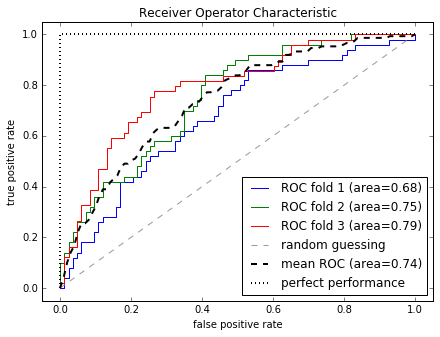

In [37]:
# Plotting ROC curve

from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from scipy import interp
plpe_lr = Pipeline([('sc1', StandardScaler()), 
                    ('pca', PCA(n_components=2)), 
                    ('clf', LogisticRegression(penalty='l2', random_state=0, C=100.0))])
X_train2 = X_train[:, [4,14]]
cv = StratifiedKFold(y_train, n_folds=3, random_state=1)
fig = plt.figure(figsize=(7,5))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train], y_train[train]).predict_proba(X_train2[test])
    fpr, tpr, thresholds = roc_curve(y_train[test], probas[:,1], pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area=%0.2f)'%(i+1, roc_auc))
plt.plot([0,1],[0,1], linestyle='--', color=(0.6, 0.6, 0.6), label='random guessing')
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--', label = 'mean ROC (area=%0.2f)'%mean_auc, lw=2)
plt.plot([0,0,1], [0,1,1], lw=2, linestyle=':', color='black', label='perfect performance')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc='lower right')
plt.show()

In [38]:
# Just finding the average ROC AUC without graph

pipe_lr = pipe_lr.fit(X_train2, y_train)
y_pred2 = pipe_lr.predict(X_test[:, [4,14]])

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
print 'ROC AUC: %.3f'% roc_auc_score(y_true=y_test, y_score=y_pred2)
print 'Accuracy: %.3f'%accuracy_score(y_true=y_test, y_pred=y_pred2)

ROC AUC: 0.672
Accuracy: 0.719
